In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data files
traffic_violations = pd.read_csv('../resources/traffic_violations_filtered.csv')
us_accidents = pd.read_csv('../resources/us_accidents_filtered_rows.csv')

traffic_violations['Accident'] = traffic_violations['Accident'].map({'Yes': 1, 'No': 0})
traffic_violations['Belts'] = traffic_violations['Belts'].map({'Yes': 1, 'No': 0})
traffic_violations['Personal Injury'] = traffic_violations['Personal Injury'].map({'Yes': 1, 'No': 0})
traffic_violations['Fatal'] = traffic_violations['Fatal'].map({'Yes': 1, 'No': 0})
traffic_violations['Alcohol'] = traffic_violations['Alcohol'].map({'Yes': 1, 'No': 0})
traffic_violations['Work Zone'] = traffic_violations['Work Zone'].map({'Yes': 1, 'No': 0})
traffic_violations['Contributed To Accident'] = traffic_violations['Contributed To Accident'].map({'Yes': 1, 'No': 0})

us_accidents['Astronomical_Twilight'] = us_accidents['Astronomical_Twilight'].map({'Day' : 1, 'Night' : 0})
us_accidents['Civil_Twilight'] = us_accidents['Civil_Twilight'].map({'Day' : 1, 'Night' : 0})
us_accidents['Nautical_Twilight'] = us_accidents['Nautical_Twilight'].map({'Day' : 1, 'Night' : 0})

# Convert date columns to datetime
date_format = '%Y-%m-%d'
us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'], format= "%Y-%m-%d %H:%M:%S")
traffic_violations['Date Of Stop'] = pd.to_datetime(traffic_violations['Date Of Stop'], format= date_format)

# Extract date parts for aggregation
us_accidents['Date'] = us_accidents['Start_Time'].dt.date
traffic_violations['Date'] = traffic_violations['Date Of Stop'].dt.date

# Aggregate data by date and state
us_accidents_agg = us_accidents.groupby(['Date']).agg({
    'Severity': 'mean', 
    'Distance(mi)': 'sum'
}).reset_index()

traffic_violations_agg = traffic_violations.groupby(['Date', 'State']).agg({
    'Accident': 'sum',
    'Belts': 'sum',
    'Personal Injury': 'sum',
    'Fatal': 'sum',
    'Alcohol': 'sum',
    'Work Zone': 'sum',
    'Contributed To Accident': 'sum'
}).reset_index()

# Merge datasets on date
merged_data = pd.merge(us_accidents_agg, traffic_violations_agg, on='Date', how='inner')

# Compute correlation matrix
correlation_matrix = merged_data.corr(numeric_only= True)

correlation_matrix


,Severity,Distance(mi),Accident,Belts,Personal Injury,Fatal,Alcohol,Work Zone,Contributed To Accident
Severity,1.000000,-0.420149,NaN,0.022570,-0.010710,-0.000097,-0.020523,-0.012532,-0.014387
Distance(mi),-0.420149,1.000000,NaN,0.008919,0.009463,0.036443,0.010670,0.020209,0.023507
Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belts,0.022570,0.008919,NaN,1.000000,0.578927,0.095030,0.289207,0.122689,0.676409
Personal Injury,-0.010710,0.009463,NaN,0.578927,1.000000,0.201036,0.214151,0.076302,0.756831
Fatal,-0.000097,0.036443,NaN,0.095030,0.201036,1.000000,0.057097,-0.002994,0.131413
Alcohol,-0.020523,0.010670,NaN,0.289207,0.214151,0.057097,1.000000,0.120395,0.285480
Work Zone,-0.012532,0.020209,NaN,0.122689,0.076302,-0.002994,0.120395,1.000000,0.116186
Contributed To Accident,-0.014387,0.023507,NaN,0.676409,0.756831,0.131413,0.285480,0.116186,1.000000


In [31]:
traffic_violations['Accident'] = traffic_violations['Accident'].map({'Yes': 1, 'No': 0})
traffic_violations['Belts'] = traffic_violations['Belts'].map({'Yes': 1, 'No': 0})
traffic_violations['Personal Injury'] = traffic_violations['Personal Injury'].map({'Yes': 1, 'No': 0})
traffic_violations['Fatal'] = traffic_violations['Fatal'].map({'Yes': 1, 'No': 0})
traffic_violations['Alcohol'] = traffic_violations['Alcohol'].map({'Yes': 1, 'No': 0})
traffic_violations['Work Zone'] = traffic_violations['Work Zone'].map({'Yes': 1, 'No': 0})
traffic_violations['Contributed To Accident'] = traffic_violations['Contributed To Accident'].map({'Yes': 1, 'No': 0})

df_accidents['Astronomical_Twilight'] = df_accidents['Astronomical_Twilight'].map({'Day' : 1, 'Night' : 0})
df_accidents['Civil_Twilight'] = df_accidents['Civil_Twilight'].map({'Day' : 1, 'Night' : 0})
df_accidents['Nautical_Twilight'] = df_accidents['Nautical_Twilight'].map({'Day' : 1, 'Night' : 0})

df_accidents.corr(numeric_only = True)
traffic_violations.corr(numeric_only = True)

,Accident,Belts,Personal Injury,Fatal,Alcohol,Work Zone,Contributed To Accident
Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belts,NaN,1.000000,0.105187,0.000819,0.001639,0.002439,0.074504
Personal Injury,NaN,0.105187,1.000000,-0.001674,0.015309,0.004872,0.344299
Fatal,NaN,0.000819,-0.001674,1.000000,-0.000605,-0.000216,0.037125
Alcohol,NaN,0.001639,0.015309,-0.000605,1.000000,-0.000590,0.017778
Work Zone,NaN,0.002439,0.004872,-0.000216,-0.000590,1.000000,-0.001092
Contributed To Accident,NaN,0.074504,0.344299,0.037125,0.017778,-0.001092,1.000000


In [14]:

# Convert the date columns to datetime
df_accidents['date'] = pd.to_datetime(df_accidents['Start_Time'])
df_violations['date'] = pd.to_datetime(df_violations['Date Of Stop'])

# Extract year and month, and aggregate by month
df_accidents['month'] = df_accidents['date'].dt.to_period('M')
df_violations['month'] = df_violations['date'].dt.to_period('M')

accidents_per_month = df_accidents.groupby('month').size().reset_index(name='traffic accidents')
violations_per_month = df_violations.groupby('month').size().reset_index(name='traffic violations')

# Merge the aggregated data on the month
df_merged = pd.merge(accidents_per_month, violations_per_month, on='month', how='outer').fillna(0)

# Convert 'month' back to string for plotting
df_merged['month'] = df_merged['month'].astype(str)

# Melt the dataframe for Plotly Express
df_melted = df_merged.melt(id_vars='month', value_vars=['traffic accidents', 'traffic violations'], 
                           var_name='type', value_name='count')

# Create the line plot
fig = px.line(df_melted, x='month', y='count', color='type', 
              labels={'month': 'Date (Months)', 'count': 'Count', 'type': ''},
              title='Monthly Traffic Accidents and Traffic Violations')

# Show the plot
fig.show()


In [5]:
def code(file_path, output):
    df = pd.read_csv(file_path)

    df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'], errors='coerce')

    new_data = df[df['Date Of Stop'].dt.year.isin([2016, 2017])]

    new_data.to_csv(output, index=False)


code('../resources/traffic_violations.csv', '../resources/traffic_violations_filtered.csv')

C:\Users\lenna\AppData\Local\Temp\ipykernel_21512\2317542515.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  violations_df['Date Of Stop'] = pd.to_datetime(violations_df['Date Of Stop'], errors='coerce', infer_datetime_format=True)
C:\Users\lenna\AppData\Local\Temp\ipykernel_21512\2317542515.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce', infer_datetime_format=True)


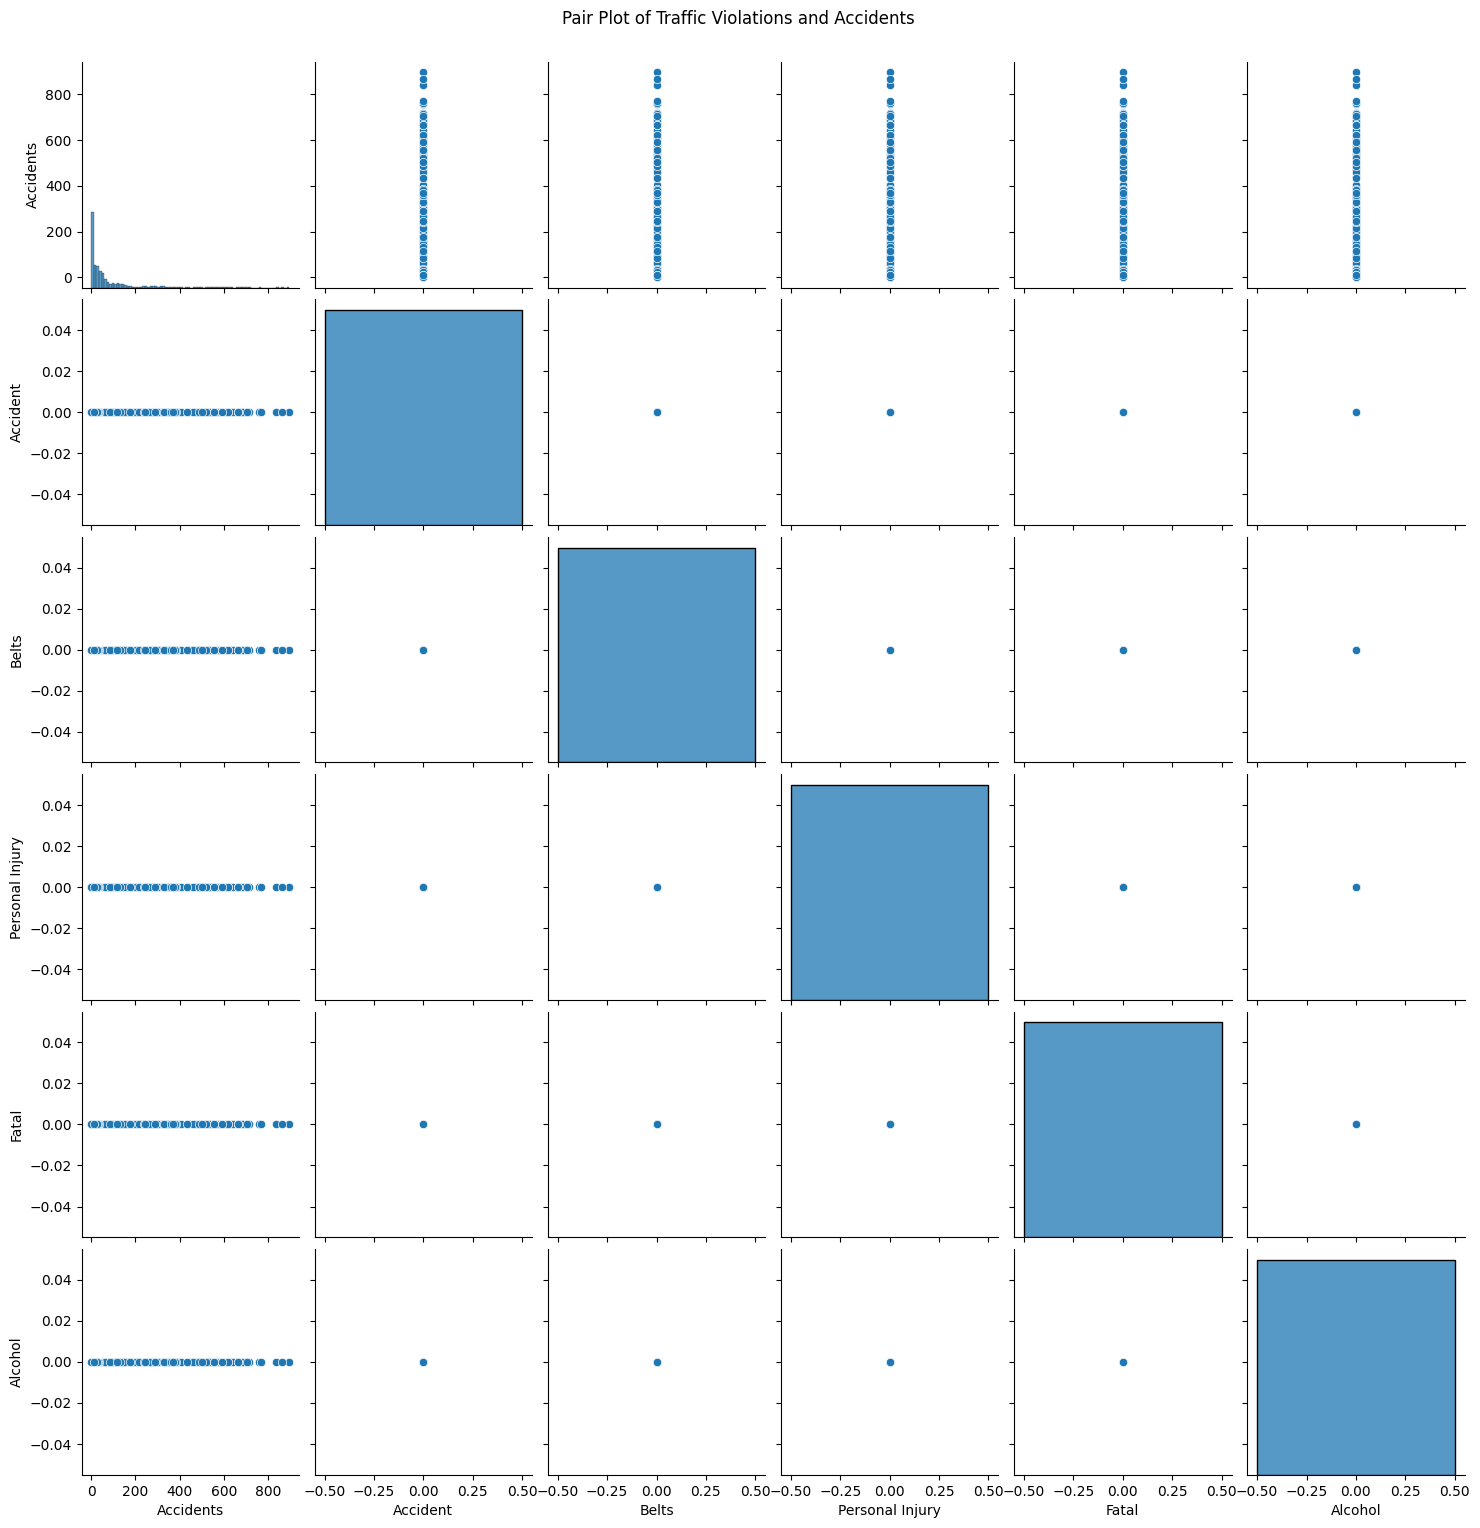

In [35]:
# Convert the 'Date Of Stop' in violations_df to a consistent date format
violations_df['Date Of Stop'] = pd.to_datetime(violations_df['Date Of Stop'], errors='coerce', infer_datetime_format=True)

# Convert the 'Start_Time' in accidents_df to a consistent date format
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce', infer_datetime_format=True)

# Define a function to map 'Yes'/'No' to 1/0
def map_yes_no(val):
    return 1 if val == 'Yes' else 0

# Apply the function to relevant columns in violations_df
violations_df['Accident'] = violations_df['Accident'].apply(map_yes_no)
violations_df['Belts'] = violations_df['Belts'].apply(map_yes_no)
violations_df['Personal Injury'] = violations_df['Personal Injury'].apply(map_yes_no)
violations_df['Fatal'] = violations_df['Fatal'].apply(map_yes_no)
violations_df['Alcohol'] = violations_df['Alcohol'].apply(map_yes_no)

# Aggregate traffic violations by date and state
violations_agg = violations_df.groupby(['Date Of Stop', 'State']).agg({
    'Accident': 'sum',
    'Belts': 'sum',
    'Personal Injury': 'sum',
    'Fatal': 'sum',
    'Alcohol': 'sum'
}).reset_index()

# Aggregate traffic accidents by date and state
accidents_agg = accidents_df.groupby([accidents_df['Start_Time'].dt.date, 'State']).size().reset_index(name='Accidents')

# Rename the date column in accidents_agg to match violations_agg
accidents_agg.rename(columns={'Start_Time': 'Date Of Stop'}, inplace=True)

# Convert 'Date Of Stop' in accidents_agg to datetime to match violations_agg
accidents_agg['Date Of Stop'] = pd.to_datetime(accidents_agg['Date Of Stop'])

# Merge the aggregated dataframes on date and state
merged_df = pd.merge(violations_agg, accidents_agg, on=['Date Of Stop', 'State'])

# Plotting the pair plot
sns.pairplot(merged_df[['Accidents', 'Accident', 'Belts', 'Personal Injury', 'Fatal', 'Alcohol']])
plt.suptitle('Pair Plot of Traffic Violations and Accidents', y=1.02)
plt.show()